In [1]:
from scipy.stats import multivariate_normal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
def load_data(path):
  data = pd.read_csv(path)
  X_train, X_test, y_train, y_test = train_test_split(data[['X1','X2']],data['Y'], test_size=0.2, stratify=data['Y'] ,random_state=42)
  return X_train, X_test, y_train, y_test 

def raw_data(path):
  data = pd.read_csv(path)
  return data

def normalization(data):
    scaler = preprocessing.StandardScaler().fit(data)
    X_scaled = scaler.transform(data)
    return X_scaled
    
def density(x1, x2 ,hists, xedges, yedges, n, x_width, y_width):
    xedges, yedges = xedges[1:], yedges[1:]
    for i, x in enumerate(xedges):
        if x1 < x:
            for j, y in enumerate(yedges):
                if x2 < y:
                    num_smaples = hists[i,j]
                    bin_area = x_width * y_width
                    return 1/n * (num_smaples / bin_area)


X_train, X_test, y_train, y_test = load_data('dataset.csv')

In [3]:
mins = X_train.min()
maxs = X_train.max()

h1, h2, h3 = 0.09, 0.3, 0.6

xedges1, yedges1 = np.arange(mins['X1'], maxs['X1'], h1), np.arange(mins['X2'], maxs['X2'], h1)
xedges2, yedges2 = np.arange(mins['X1'], maxs['X1'], h2), np.arange(mins['X2'], maxs['X2'], h2)
xedges3, yedges3 = np.arange(mins['X1'], maxs['X1'], h3), np.arange(mins['X2'], maxs['X2'], h3)




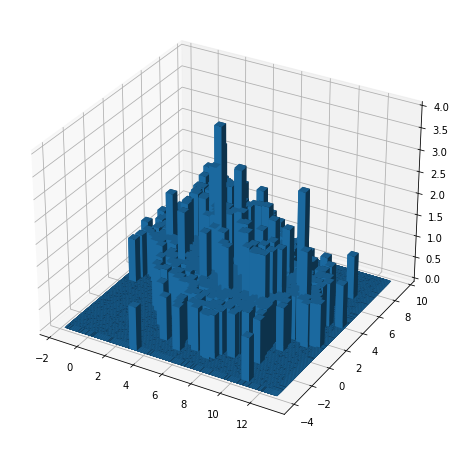

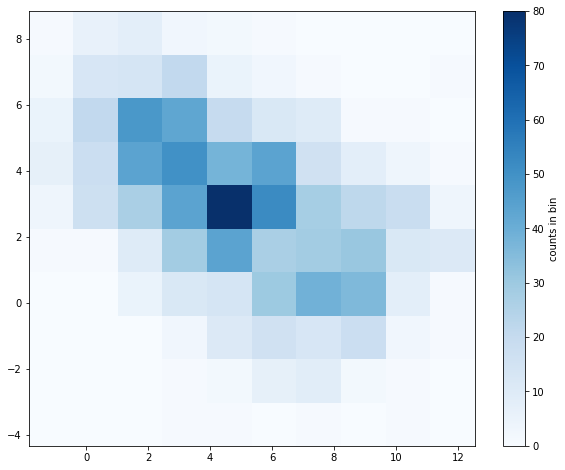

In [4]:
hist, xedges, yedges = np.histogram2d(X_train['X1'], X_train['X2'], bins=(xedges1, yedges1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

plt.hist2d(X_train['X1'], X_train['X2'],  cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')


plt.show()

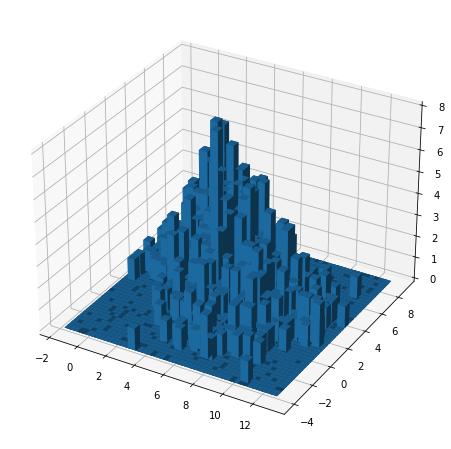

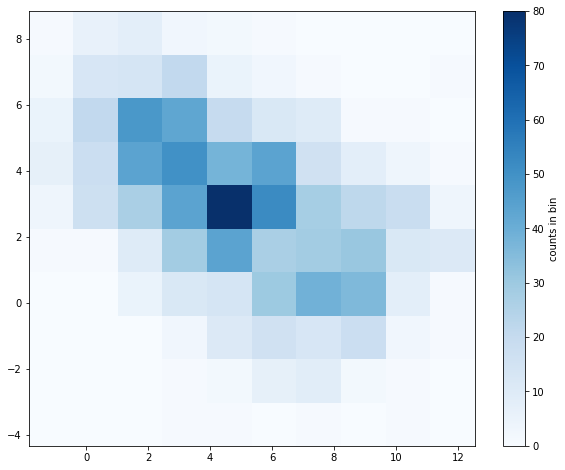

In [5]:
hist, xedges, yedges = np.histogram2d(X_train['X1'], X_train['X2'], bins=(xedges2, yedges2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

plt.hist2d(X_train['X1'], X_train['X2'],  cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')


plt.show()

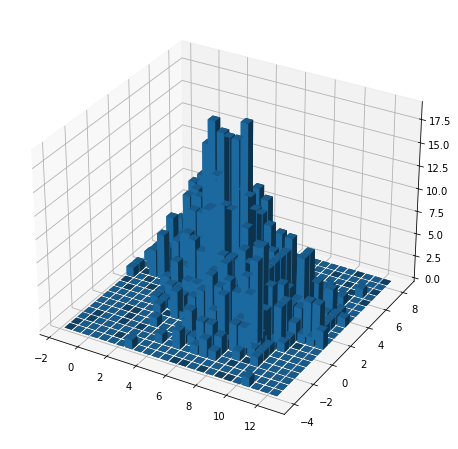

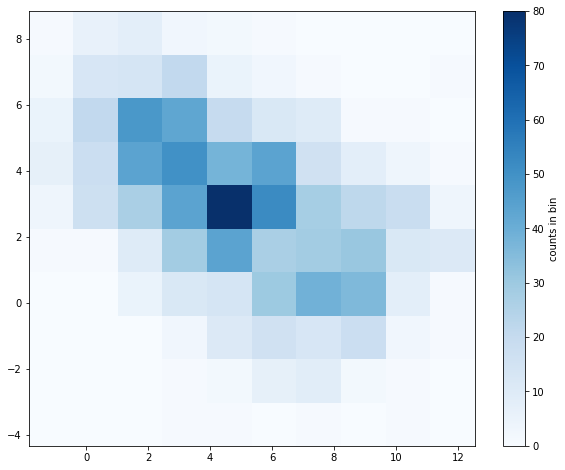

In [6]:
hist, xedges, yedges = np.histogram2d(X_train['X1'], X_train['X2'], bins=(xedges3, yedges3))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

plt.hist2d(X_train['X1'], X_train['X2'],  cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')


plt.show()

<ipython-input-9-b83e014e9ccc>:19: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, pdf)


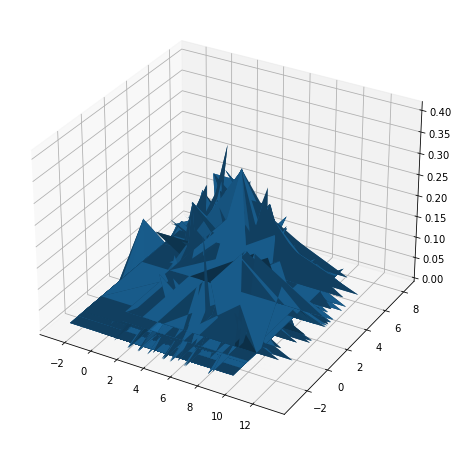

In [9]:
from matplotlib import cm

hist, xedges, yedges = np.histogram2d(X_train['X1'], X_train['X2'], bins=(xedges1, yedges1))
n = X_train.shape[0]

    
X = X_test['X1']
Y = X_test['X2']
X, Y = np.meshgrid(X, Y)

pdf = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        pdf[i,j] = density(X[i,j], Y[i,j] ,hist, xedges, yedges, n, h1, h1)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, pdf)
plt.show()

<ipython-input-11-d93e3906b422>:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, pdf)


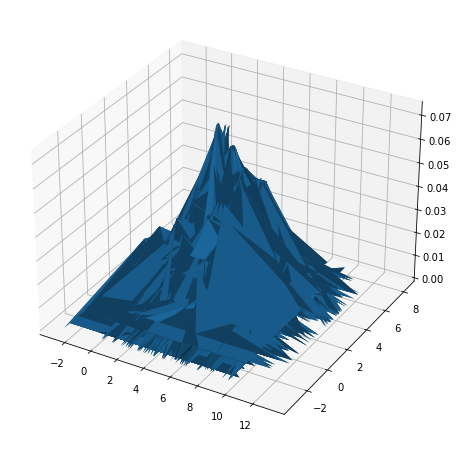

In [11]:
hist, xedges, yedges = np.histogram2d(X_train['X1'], X_train['X2'], bins=(xedges2, yedges2))
n = X_train.shape[0]
X = X_test['X1']
Y = X_test['X2']
X, Y = np.meshgrid(X, Y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        pdf[i,j] = density(X[i,j], Y[i,j] ,hist, xedges, yedges, n, h2, h2)
    
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, pdf)
plt.show()

<ipython-input-13-7fb5d47f4736>:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, pdf)


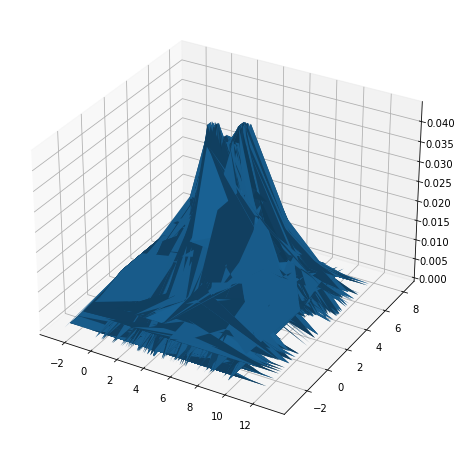

In [13]:
hist, xedges, yedges = np.histogram2d(X_train['X1'], X_train['X2'], bins=(xedges3, yedges3))
n = X_train.shape[0]
X = X_test['X1']
Y = X_test['X2']
X, Y = np.meshgrid(X, Y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        pdf[i,j] = density(X[i,j], Y[i,j] ,hist, xedges, yedges, n, h3, h3)
    
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, pdf)
plt.show()